In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from collections import Counter
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AffinityPropagation



# Functions that will be used later for reducing the written code
def model(mod, X, Y):
    #Data split to Train and test
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
    model_object=mod
    model_object.fit(X_train, y_train)
    evaluation(model_object)
    return model_object

def evaluation(model_object):
    #Evalution of model
    score=cross_val_score(X=X_test, y=y_test, estimator=model_object, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)\n" % (score.mean(), score.std() * 2))
    pos_label=None
    y_pred=pd.Series(model_object.predict(X_test))
    
    #Plotting the ROC-AUC curve   
    if ((len(np.unique(y_test)) > 2)):
        pos_label=2
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred, pos_label=pos_label)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', linewidth=4,label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right', fancybox=True, fontsize='large')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic')
    
    fpr=fpr[1]
    tpr=tpr[1]
    print ('The sensitivity i.e true positives is {0:2f}% '.format(tpr*100))
    print ('The specificity i.e true negatives is {0:2f}% '.format((1-fpr)*100))
    print ('The Type I error i.e. false negatives is {0:2f}% '.format((1-tpr)*100))
    print ('The Type II error i.e. false positives is {0:2f}% '.format(fpr*100))
    return

%matplotlib inline
sns.set(rc={'figure.figsize':(12,7)}, style='whitegrid', color_codes=True)

/Users/Sri/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df=pd.read_csv('results.csv')
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [4]:
# Dropping ctz since most of the data here is null.
df.drop('ctz', inplace=True, axis=1)

# Removing the '-' in columns by deleting the rows.
df.replace('-', value=np.nan, inplace=True)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14609 entries, 0 to 14608
Data columns (total 20 columns):
25k          14609 non-null object
age          14609 non-null int64
name         14609 non-null object
division     14609 non-null int64
10k          14609 non-null object
gender       14609 non-null object
half         14609 non-null object
official     14609 non-null float64
bib          14609 non-null object
country      14609 non-null object
overall      14609 non-null int64
pace         14609 non-null float64
state        14609 non-null object
30k          14609 non-null object
5k           14609 non-null object
genderdiv    14609 non-null int64
20k          14609 non-null object
35k          14609 non-null object
city         14609 non-null object
40k          14609 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 2.2+ MB


In [5]:
# Need to convert the 25k, 10k mile finish results to numbers from strings of numbers

for name in df.columns:
    if name.find('k') > 0:
        df[name] = pd.to_numeric(df[name])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14609 entries, 0 to 14608
Data columns (total 20 columns):
25k          14609 non-null float64
age          14609 non-null int64
name         14609 non-null object
division     14609 non-null int64
10k          14609 non-null float64
gender       14609 non-null object
half         14609 non-null object
official     14609 non-null float64
bib          14609 non-null object
country      14609 non-null object
overall      14609 non-null int64
pace         14609 non-null float64
state        14609 non-null object
30k          14609 non-null float64
5k           14609 non-null float64
genderdiv    14609 non-null int64
20k          14609 non-null float64
35k          14609 non-null float64
city         14609 non-null object
40k          14609 non-null float64
dtypes: float64(9), int64(4), object(7)
memory usage: 2.2+ MB


In [6]:
# Normalization of the data of all numeric columns
col_names=df.select_dtypes(include=['number']).columns
df=df.sample(frac=0.5, replace=True, random_state=1)
df.reset_index(drop=True, inplace=True)
X_norm=pd.DataFrame(normalize(df[col_names]), columns=col_names)

In [7]:
# Converting gender categorical column into a binary feature
X_norm['gender'] = np.where(df['gender']=='M', 1, 0)
col_names=X_norm.columns
print ('No. of columns normalized for clustering ', X_norm.shape[1])
print ("\nColumns/Features used in Clustering analysis ", col_names)

No. of columns normalized for clustering  14

Columns/Features used in Clustering analysis  Index(['25k', 'age', 'division', '10k', 'official', 'overall', 'pace', '30k',
       '5k', 'genderdiv', '20k', '35k', '40k', 'gender'],
      dtype='object')


Since we do not know accurately how many clusters can be possible here  let us use mean shift clustering method to calculate the possible clusters by its algorithm

In [8]:
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=X_norm.shape[0])
ms=MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit_predict(X_norm)
labels=ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_=len(np.unique(labels))
print("Number of estimated clusters by the algorithm: {}".format(n_clusters_))

Number of estimated clusters by the algorithm: 4


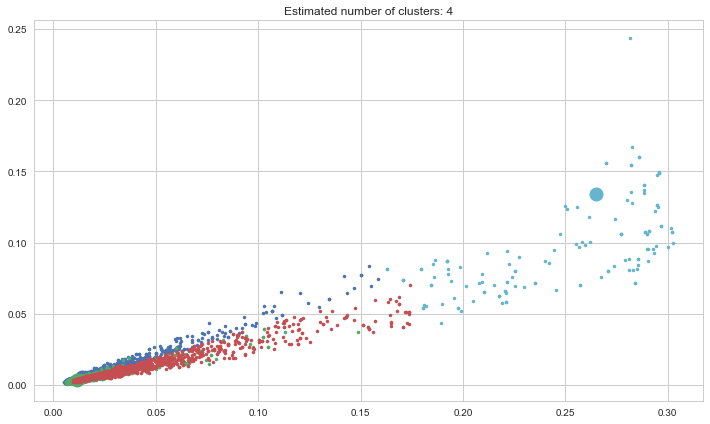

In [9]:
from itertools import cycle
X_norm_array=np.array(X_norm)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_norm_array[my_members, 0], X_norm_array[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Now let us see which clustering models can perform better by evaluating them. But to do the evaluation we donot have any ground truth that the number of clusters should be known or it should be known that any datapoint should belong to a particular cluster. Since we dont know any of these the best metric to evaluate the clustering models is by Silhouette coefficient.

Silhouette Coefficient is the similarity test...how similar are the datapoints classified in a cluster with each other.

Values range from -1 for very bad clusters to +1 for very dense clusters.

In [10]:
def SilCft(mod, X_norm):
    mod.fit(X_norm)
    labels = mod.labels_
    print(metrics.silhouette_score(X_norm, labels, metric='euclidean'))
    return metrics.silhouette_score(X_norm, labels, metric='euclidean')
score={}

In [11]:
######## K Mean clustering
score['K Mean'] = SilCft(KMeans(n_clusters=4, random_state=42), X_norm)

0.749743753274


In [12]:
######## MeanShift clustering
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=X_norm.shape[0])
score['MeanShift'] = SilCft(MeanShift(bandwidth=bandwidth, bin_seeding=True), X_norm)

0.74824606966


In [13]:
######## Spectral clustering
score['Spectral'] = SilCft(SpectralClustering(n_clusters=4), X_norm)

0.741423903716


In [14]:
######## Affinity Propagation clustering
#score['AffinityPropg'] = SilCft(AffinityPropagation(), X_norm)
## Affinity P clustering is stalling the system so...this segment is not run here.

In [15]:
score

{'K Mean': 0.74974375327410137,
 'MeanShift': 0.74824606966003016,
 'Spectral': 0.7414239037162158}

From these scores we can say that all of the models except Affinity propagation performed equally well and cluster datapoints were more similar to their centroid and other cluster centers.

Now we know that the data can be clustered into 4 groups. But we donot know how these groups were formed or what these 4 groups represetn in a marathon data.

To know this, I thought by using what rows fall into which cluster data we can do a supervised learning model and get the feature importance from the model and see what factors can go in predicting the four clusters.

So then we can say probably these four clusters would also be formed based on these four features or in other words, the marathon data can be classified into four clusters based on these features.

In [16]:
# Assigning X and Y
df['Clusters_assign'] = pd.DataFrame(labels)
Y = df['Clusters_assign']
X = X_norm

In [17]:
df['Clusters_assign'].value_counts()

1    2990
0    2936
2    1244
3     134
Name: Clusters_assign, dtype: int64

We see a class imbalance problem here which can lead to errors.So fixing it by SMOTE analysis or oversampling and undersanmpling.

In [19]:
# SMOTE i.e oversampling and undersampling
# Storing the column names as we are generating numpy arrays which dont have labels

smote_nc = SMOTENC(categorical_features=[0], random_state=0)
X, Y = smote_nc.fit_resample(X, Y)
print('Resampled dataset samples per each class\n {}'.format(Counter(Y)))

Resampled dataset samples per each class
 Counter({1: 2990, 3: 2990, 0: 2990, 2: 2990})


### Gradient Boost Classifier

Accuracy: 1.00 (+/- 0.00)

The sensitivity i.e true positives is 0.000000% 
The specificity i.e true negatives is 66.957885% 
The Type I error i.e. false negatives is 100.000000% 
The Type II error i.e. false positives is 33.042115% 


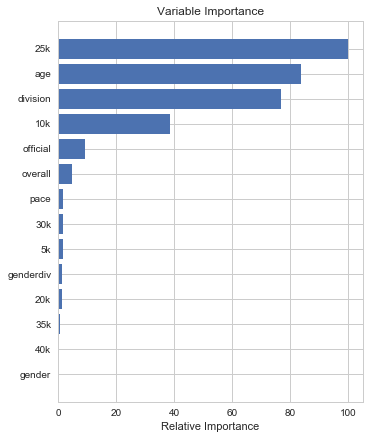

In [20]:
params = {'n_estimators': 500,
          'max_depth': 2,
           'learning_rate': 0.01,
          'loss': 'deviance'}
mo=model(ensemble.GradientBoostingClassifier(**params), X, Y)
feature_importance = mo.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
fea_imp=np.array(sorted(list(feature_importance), reverse=True)[0:40])
sorted_idx = np.argsort(fea_imp)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, fea_imp[sorted_idx], align='center')
plt.yticks(pos, col_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

We can conclude from this exercise that the all the boston marathon data can be divided into four clusters based majorly on the run time of 25k mile time or age or division or 10k mile time in that order.